# Biblioteki

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc

# Analiza zbioru

In [75]:
df_heart = pd.read_csv("/content/heart_statlog_cleveland_hungary_final.csv")

In [76]:
df_heart.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [77]:
df_heart.shape

(1190, 12)

In [78]:
print(df_heart["target"].unique())

[0 1]


In [55]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [56]:
df_heart.columns

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

In [57]:
df_heart.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1190.0,53.720168,9.358203,28.0,47.0,54.0,60.00,77.0
sex,1190.0,0.763866,0.424884,0.0,1.0,1.0,1.00,1.0
chest pain type,1190.0,3.232773,0.935480,1.0,3.0,4.0,4.00,4.0
resting bp s,1190.0,132.153782,18.368823,0.0,120.0,130.0,140.00,200.0
cholesterol,1190.0,210.363866,101.420489,0.0,188.0,229.0,269.75,603.0
fasting blood sugar,1190.0,0.213445,0.409912,0.0,0.0,0.0,0.00,1.0
resting ecg,1190.0,0.698319,0.870359,0.0,0.0,0.0,2.00,2.0
max heart rate,1190.0,139.732773,25.517636,60.0,121.0,140.5,160.00,202.0
exercise angina,1190.0,0.387395,0.487360,0.0,0.0,0.0,1.00,1.0
oldpeak,1190.0,0.922773,1.086337,-2.6,0.0,0.6,1.60,6.2


In [58]:
df_heart.isna().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [13]:
#df_heart.duplicated().sum()

# EDA

In [59]:
df_heart['target'].value_counts()

target
1    629
0    561
Name: count, dtype: int64

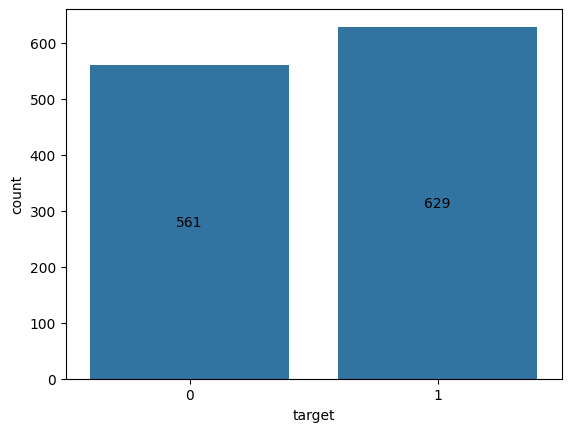

n=629
% positive samples: 52.85714285714286 %


In [60]:
plt.clf()
ax = sns.countplot(x=df_heart["target"])

# Dodanie wartości liczbowych wewnątrz prostokątów
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2, height / 2),
                ha='center', va='center')

plt.show()

n = len(df_heart[df_heart["target"] == 1])
print(f"n={n}")
print(f"% positive samples: {n / len(df_heart) * 100} %")

# wynika z tego że zbiór danych jest względnie zbalanoswany

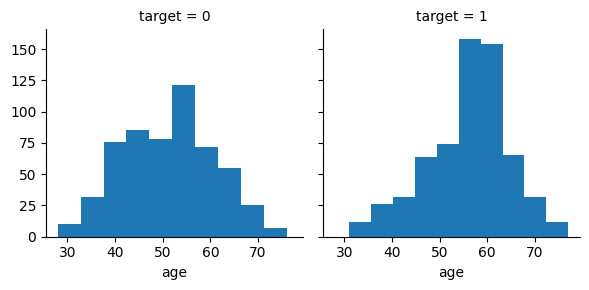

In [16]:
# Wykres wieku do choroby
age = sns.FacetGrid(df_heart, col='target')
age.map(plt.hist, 'age', bins=10)

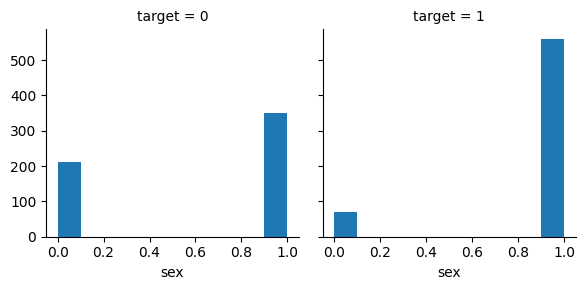

In [17]:
# Wpływ płć na choroby
sex = sns.FacetGrid(df_heart, col='target')
sex.map(plt.hist, 'sex', bins=10)

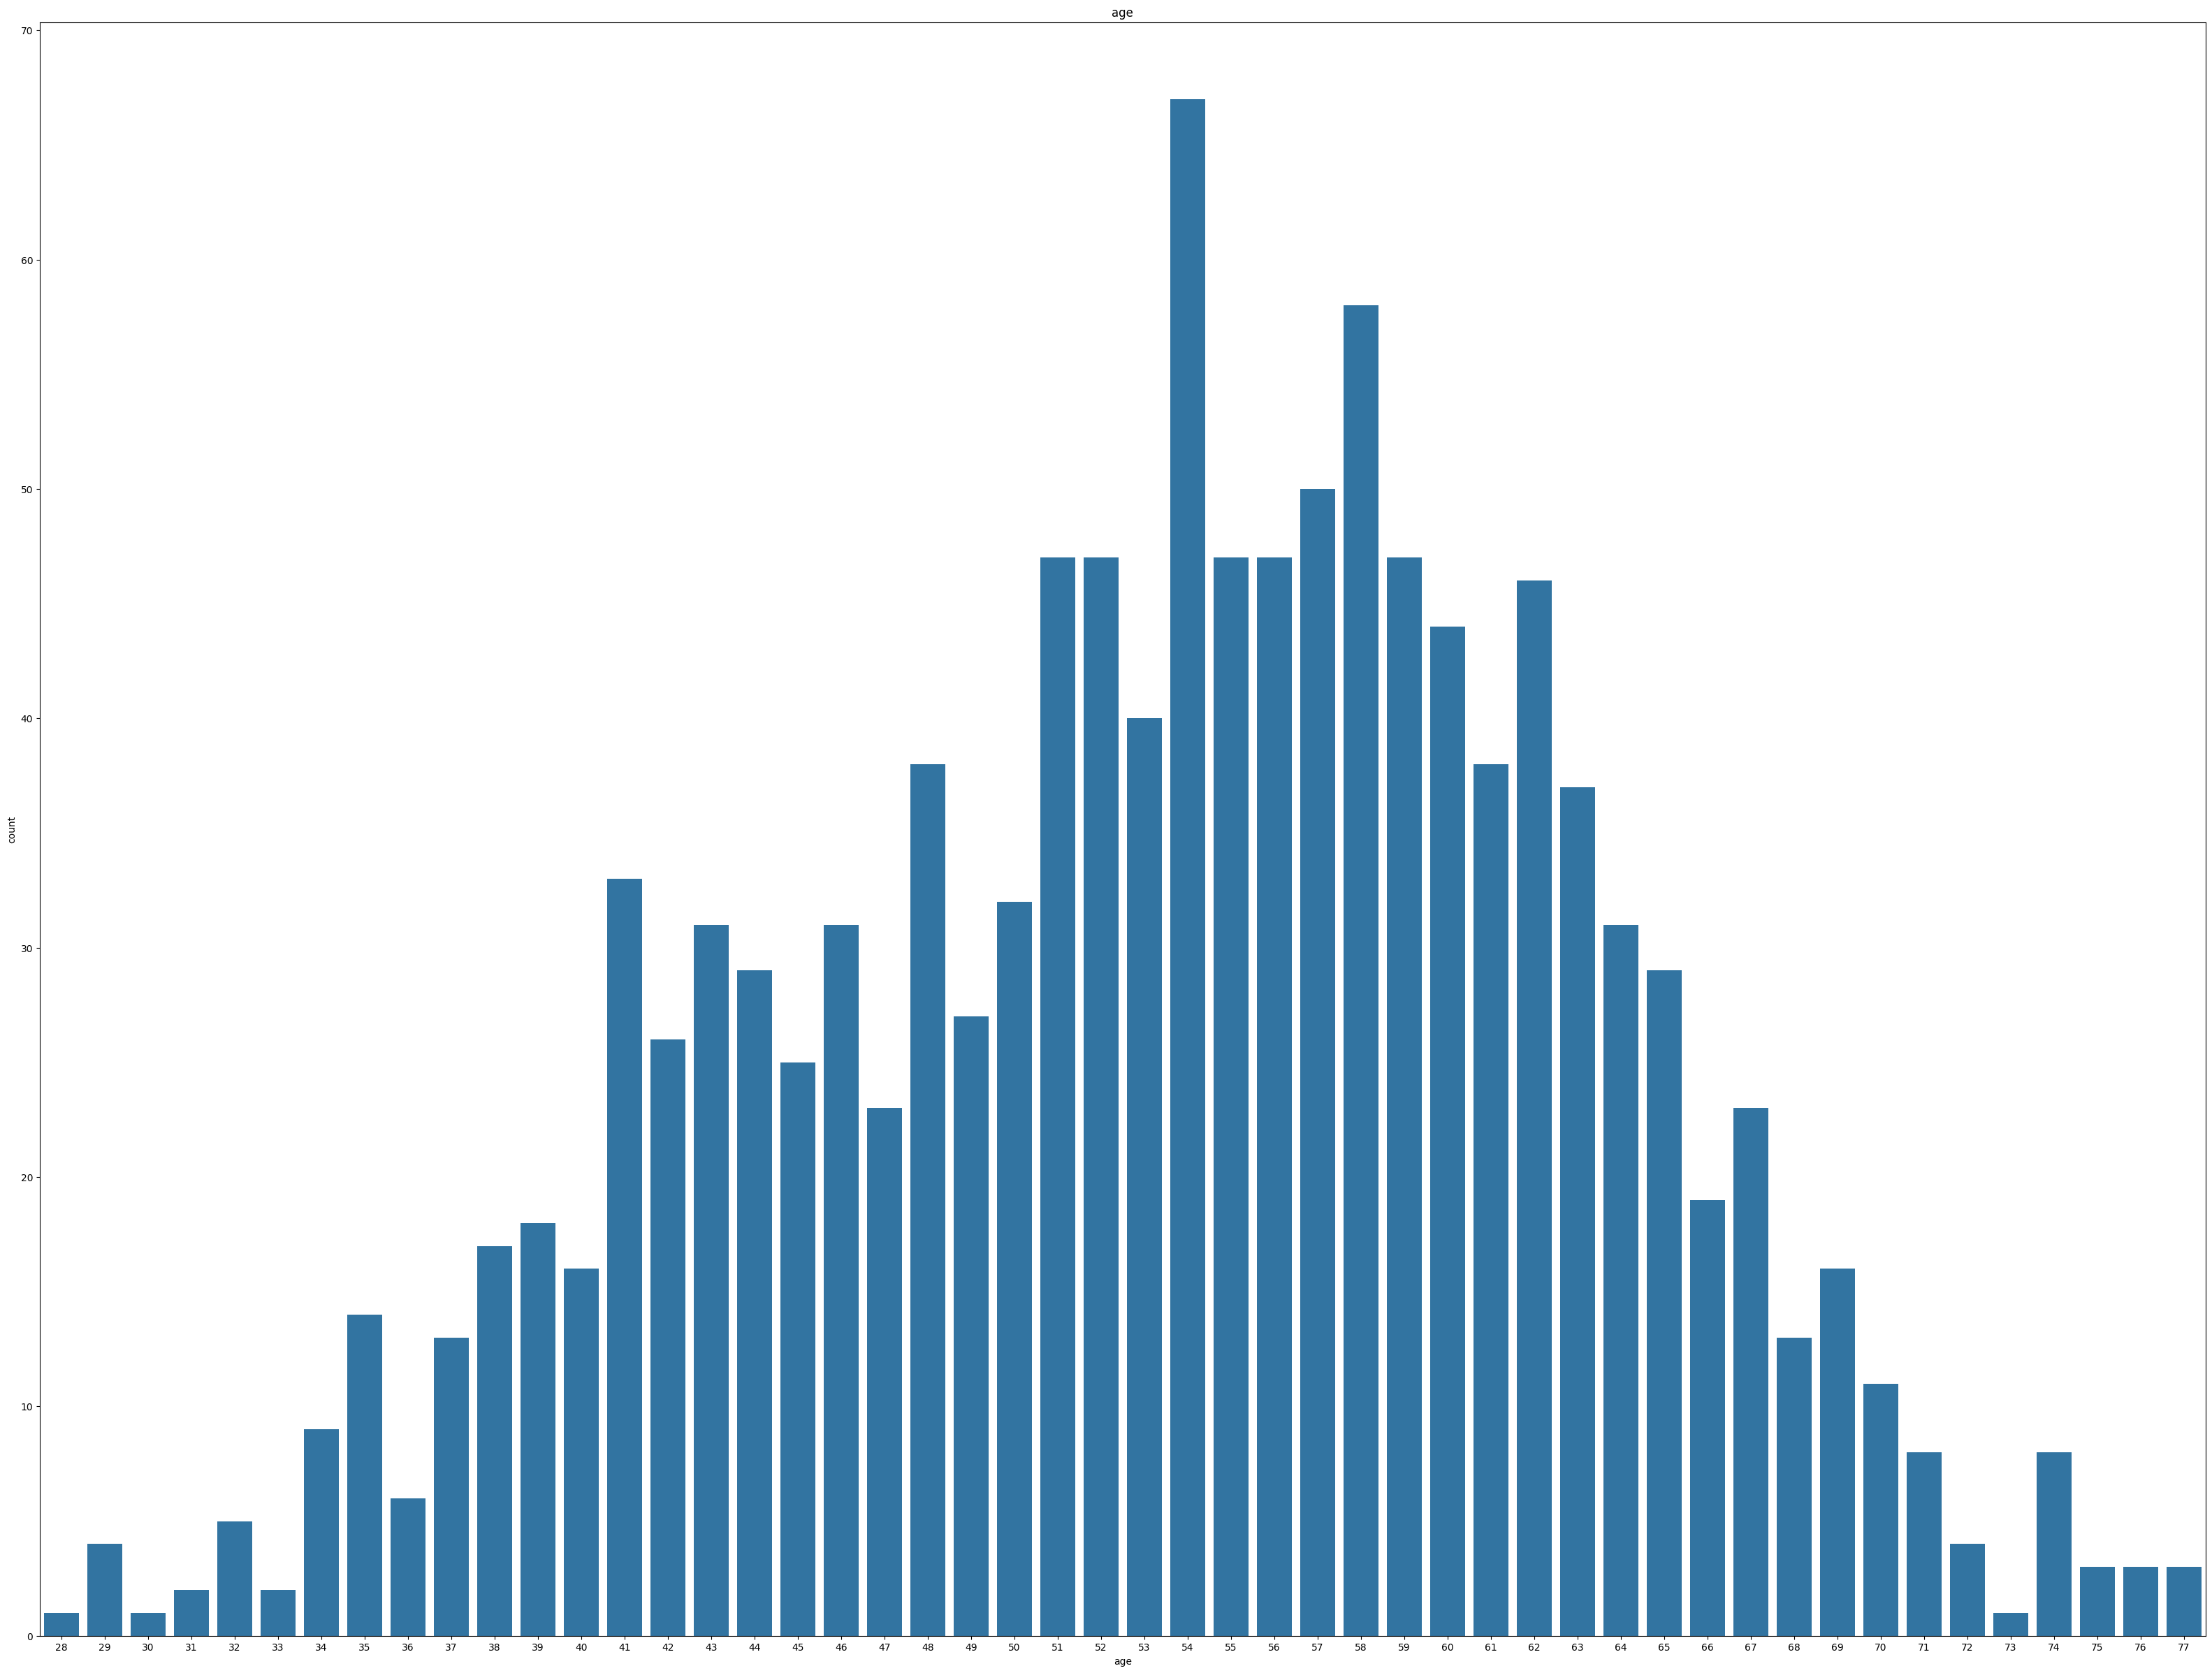

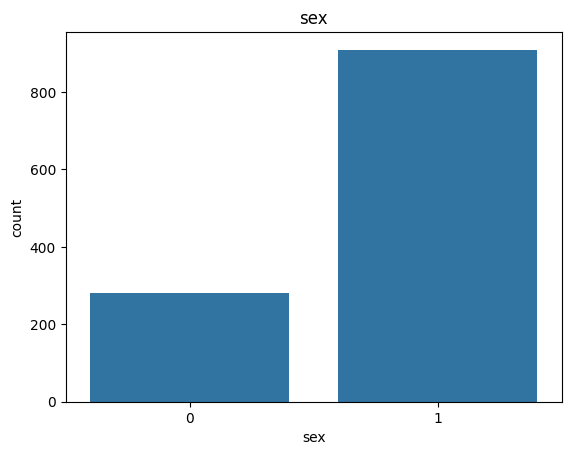

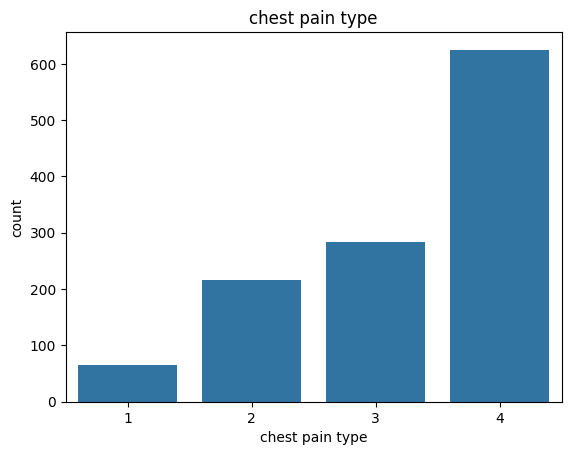

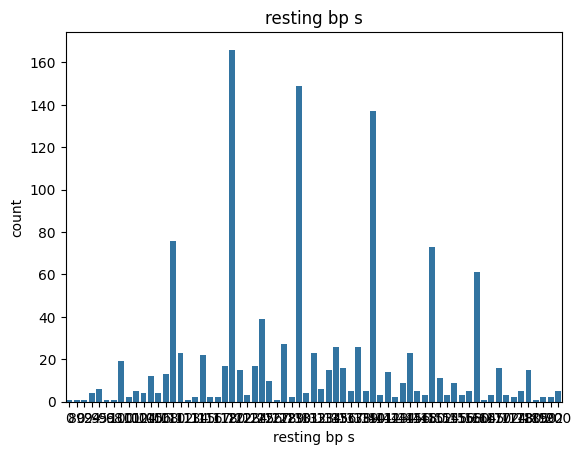

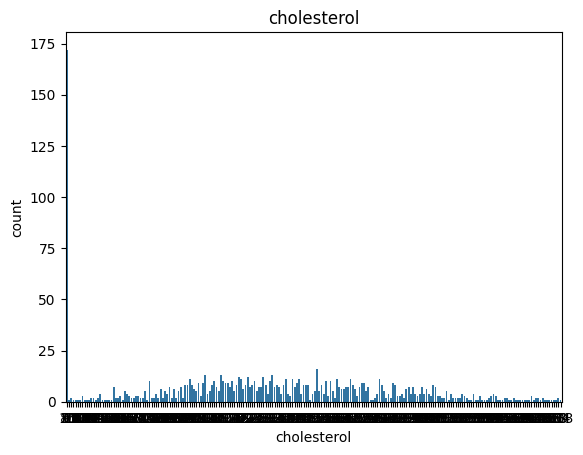

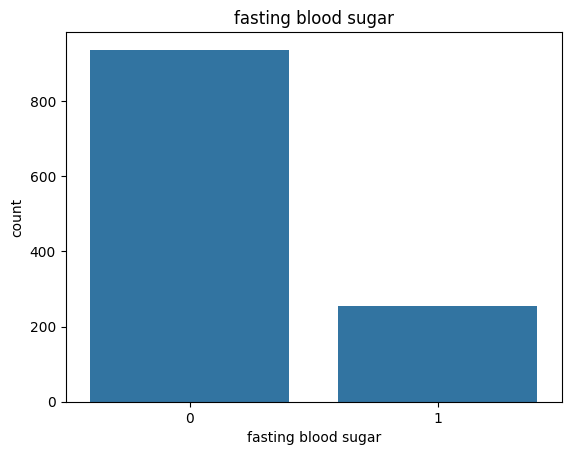

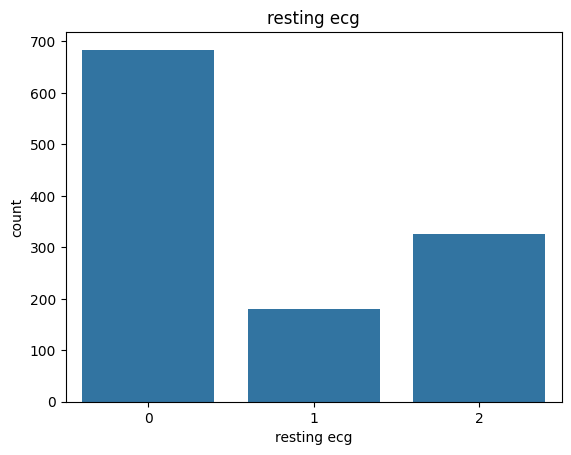

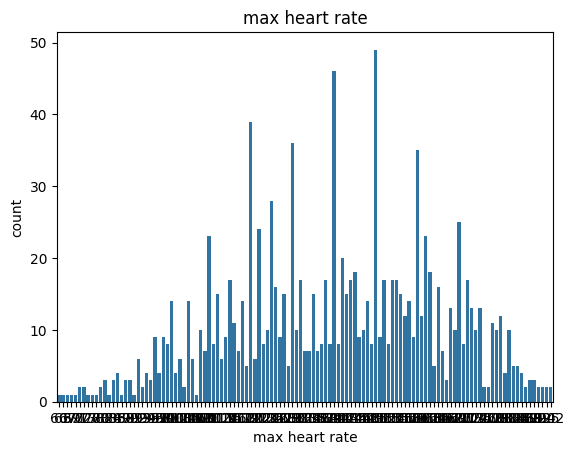

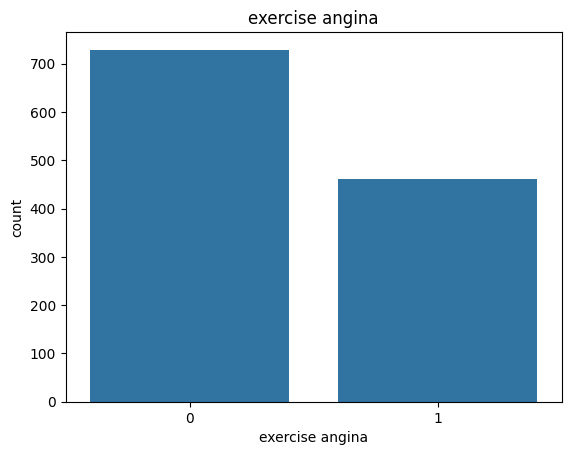

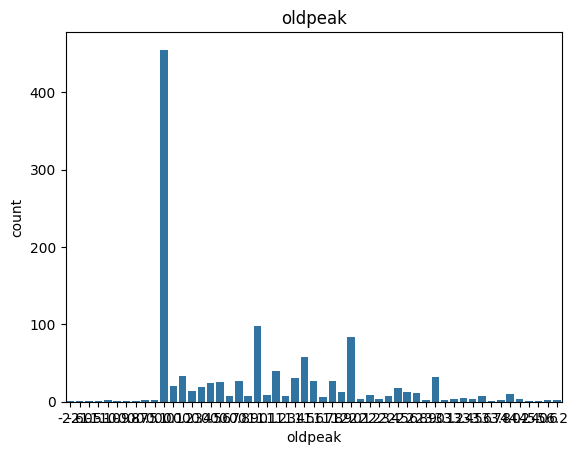

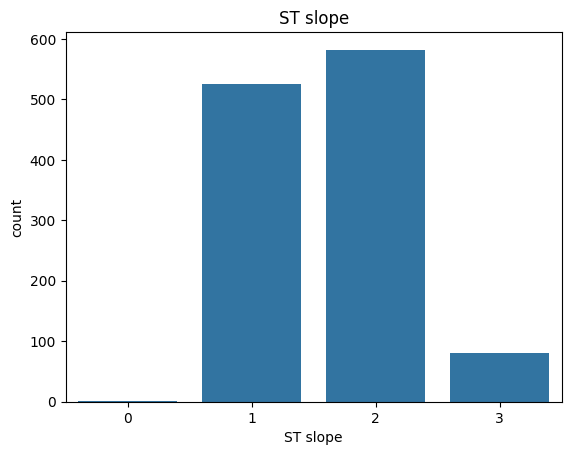

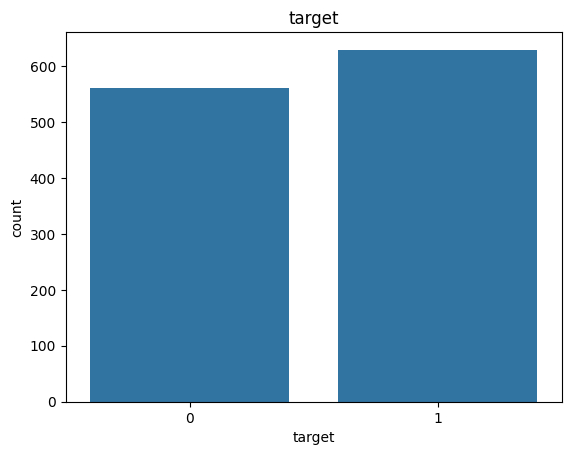

In [18]:
# Rozkład zmiennych numerycznych
numerical_columns = df_heart.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(40,30), dpi=100)

for num, col in enumerate(list(numerical_columns), 1):
    sns.countplot(x=df_heart[col])
    plt.title(col)
    plt.show()

In [19]:
# Badanie korelacji
df_heart.corr
corr_matrix = df_heart.corr()
filtered = corr_matrix[(corr_matrix > 0.5) | (corr_matrix < -0.5)]

In [20]:
filtered

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
age,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chest pain type,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
resting bp s,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cholesterol,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fasting blood sugar,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
resting ecg,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
max heart rate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
exercise angina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
oldpeak,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.524639,NaN


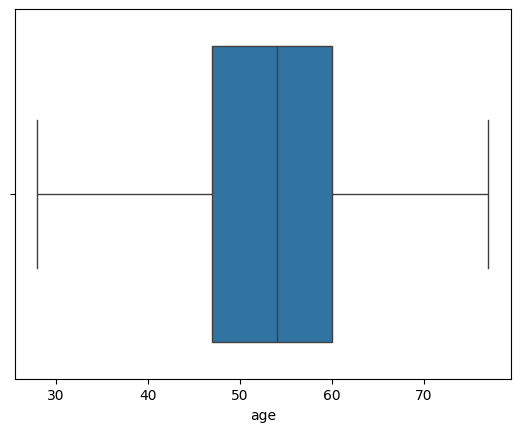

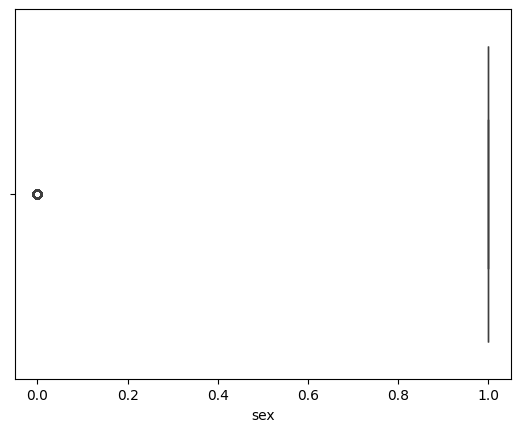

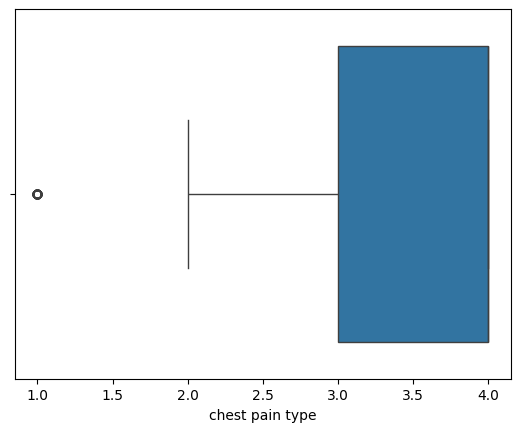

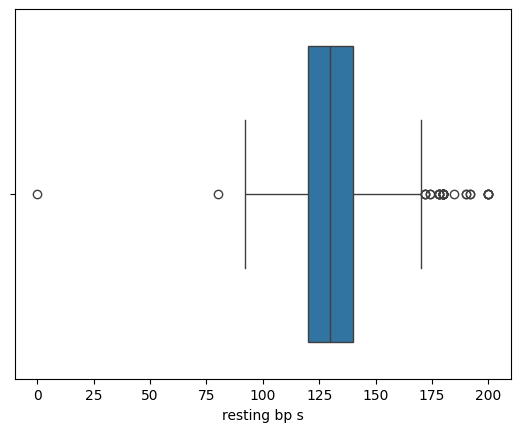

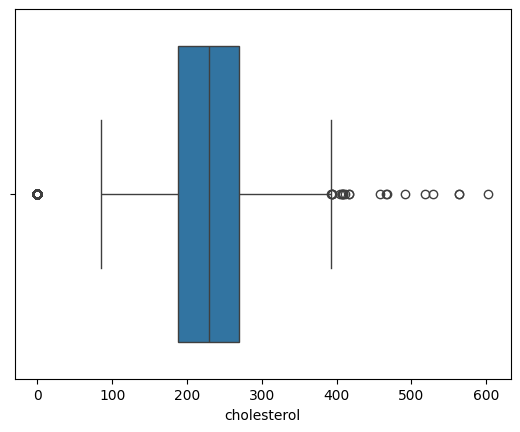

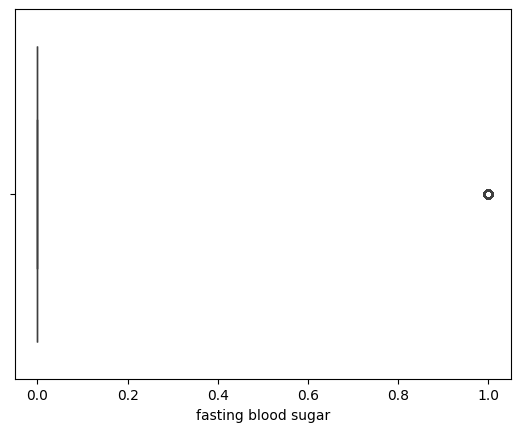

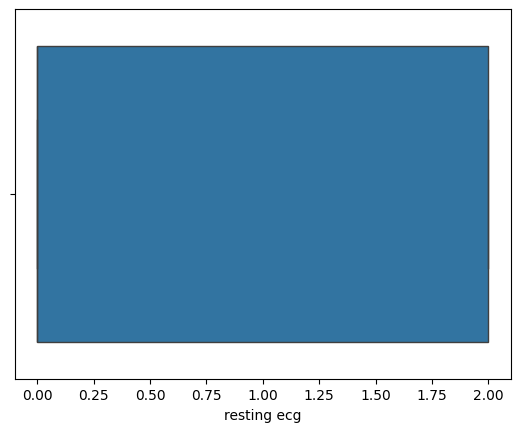

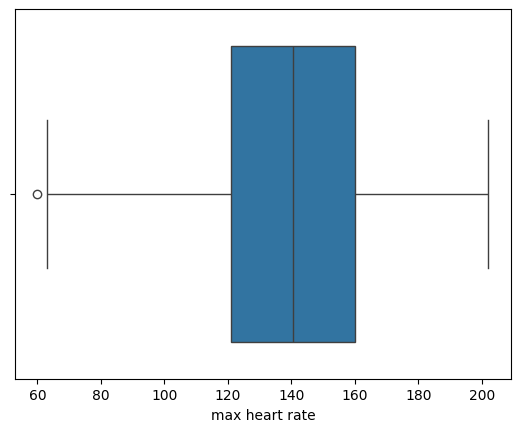

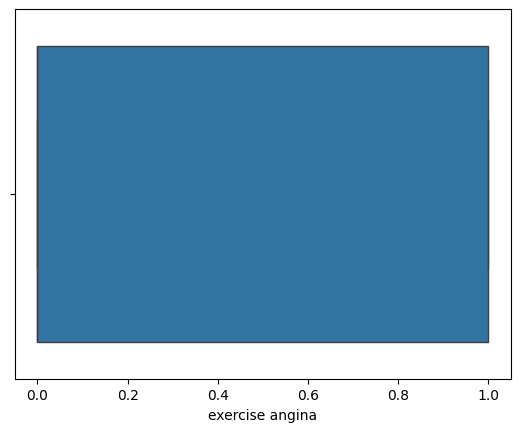

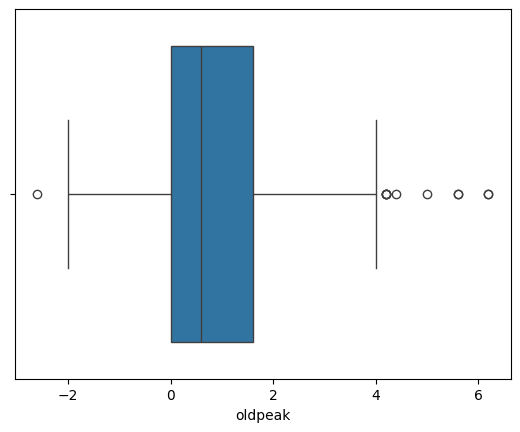

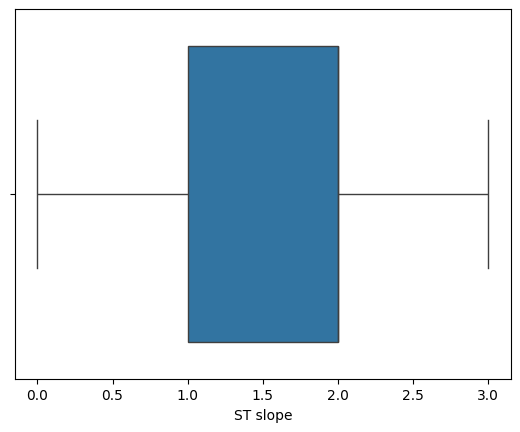

In [21]:
# Analiza punktów skajnych
outliners = ['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol', 'fasting blood sugar', 'resting ecg', 'max heart rate','exercise angina', 'oldpeak', 'ST slope']

for i, col in enumerate(df_heart[outliners]):
  sns.boxplot(x=col, data=df_heart)
  plt.show()

In [22]:
# Usuwanie punktów skrajnych za pomocą metody opartej na zakresie między kwartylowym
numerical_columns = df_heart.select_dtypes(include=[np.number])

def detect_outliers(df_heart, n, features):
    outliers_indices = []
    for col in features:
        Q1 = np.percentile(df_heart[col], 25)
        Q3 = np.percentile(df_heart[col], 75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_index_list = df_heart[(df_heart[col] < lower_bound) | (df_heart[col] > upper_bound)].index
        outliers_indices.extend(outlier_index_list)
    outliers_indices = pd.Series(outliers_indices)
    return outliers_indices.value_counts().index[:n]

outliers_to_drop = detect_outliers(df_heart, 5, numerical_columns.columns)
print('Indeksy wartości odstających do usunięcia:', outliers_to_drop)

Indeksy wartości odstających do usunięcia: Index([397, 366, 340, 323, 306], dtype='int64')


In [23]:
df_heart = df_heart.drop(outliers_to_drop, axis=0)

In [24]:
df_heart.shape

(1185, 12)

# Feature Selection

In [61]:
X = df_heart.drop(columns=['target'], axis=1)
y = df_heart['target']

In [62]:
y = y.values.reshape(-1,1)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model regresji logistycznej

In [93]:
lg = LogisticRegression(max_iter=1000)
lg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LogisticRegression(max_iter=1000)

In [94]:
# Ocena jakość modelu
lg.score(X_train, y_train)

0.8224789915966386

In [95]:
y_pred_lg = lg.predict(X_test)
print(accuracy_score(y_test, y_pred_lg))

0.8613445378151261


[[ 90  17]
 [ 16 115]]


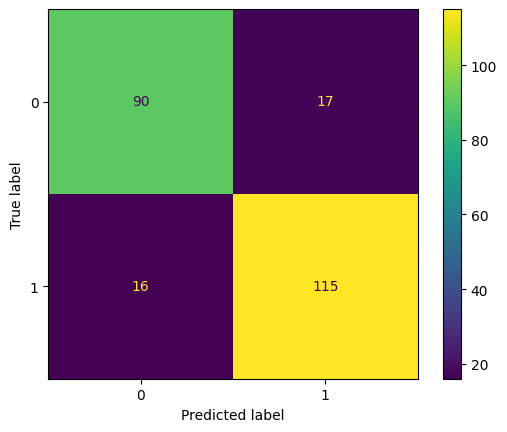

In [96]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lg)
print(confusion_matrix(y_test, y_pred_lg))

In [97]:
print(classification_report(y_test, y_pred_lg))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85       107
           1       0.87      0.88      0.87       131

    accuracy                           0.86       238
   macro avg       0.86      0.86      0.86       238
weighted avg       0.86      0.86      0.86       238



# Model LGBM

In [69]:
lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 498, number of negative: 454
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000144 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 396
[LightGBM] [Info] Number of data points in the train set: 952, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.523109 -> initscore=0.092503
[LightGBM] [Info] Start training from score 0.092503


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LGBMClassifier()

In [70]:
# Ocena jakość modelu
lgbm.score(X_train, y_train)

1.0

In [71]:
y_pred_lgbm = lgbm.predict(X_test)
print(accuracy_score(y_test, y_pred_lgbm))

0.9537815126050421


[[101   6]
 [  5 126]]


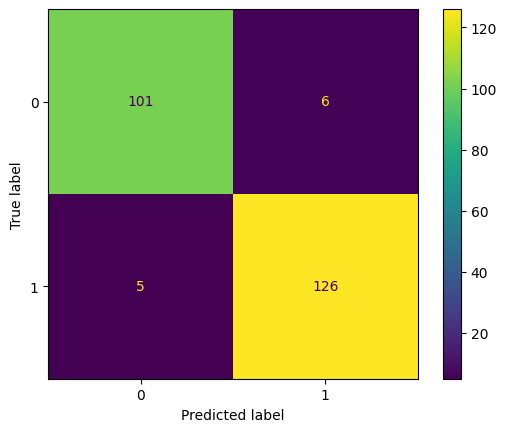

In [72]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lgbm)
print(confusion_matrix(y_test, y_pred_lgbm))

In [73]:
print(classification_report(y_test, y_pred_lgbm))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       107
           1       0.95      0.96      0.96       131

    accuracy                           0.95       238
   macro avg       0.95      0.95      0.95       238
weighted avg       0.95      0.95      0.95       238



In [92]:
# Wykonanie predykcji na zbiorze testowym
y_pred = lgbm.predict(X_test)
y_pred_proba = lgbm.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test, y_pred)
print(f'Dokładność modelu na zbiorze testowym: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Dokładność modelu na zbiorze testowym: 0.93
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       107
           1       0.93      0.94      0.94       131

    accuracy                           0.93       238
   macro avg       0.93      0.93      0.93       238
weighted avg       0.93      0.93      0.93       238



In [38]:
# Porównanie
regresja_logistyczna = {'train': round(lg.score(X_train, y_train), 2), 'test': round(accuracy_score(y_test, y_pred_lg), 2)}
LGBMClassifier = {'train': round(lgbm.score(X_train, y_train), 2), 'test': round(accuracy_score(y_test, y_pred_lgbm), 2)}

In [39]:
pd.DataFrame({'regresja_logistyczna': regresja_logistyczna, 'LGBMClassifier' : LGBMClassifier})

,regresja_logistyczna,LGBMClassifier
train,0.82,1.00
test,0.83,0.92


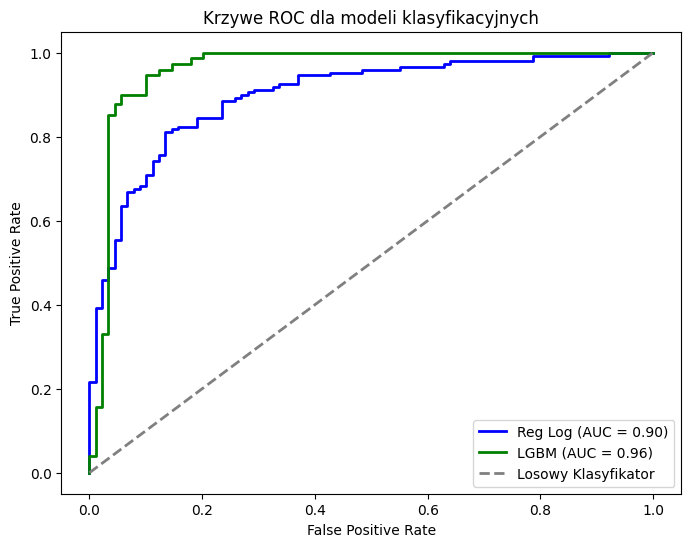

In [40]:
# Krzywa ROC
y_probabilities_lg = lg.predict_proba(X_test)[:,1]
y_probabilities_lgbm = lgbm.predict_proba(X_test)[:,1]

fpr1, tpr1, tresholds1 = roc_curve(y_test, y_probabilities_lg)
fpr2, tpr2, tresholds2 = roc_curve(y_test, y_probabilities_lgbm)


roc_auc1 = auc(fpr1, tpr1)
roc_auc2 = auc(fpr2, tpr2)

plt.figure(figsize=(8,6))
plt.plot(fpr1, tpr1, color='blue', lw=2, label='Reg Log (AUC = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, color='green', lw=2, label='LGBM (AUC = %0.2f)' % roc_auc2)
plt.plot([0,1], [0,1], color='gray', lw=2, linestyle='--', label='Losowy Klasyfikator')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Krzywe ROC dla modeli klasyfikacyjnych')
plt.legend(loc='lower right')
plt.show()

# Interaktywny dashboard

In [41]:
!pip install explainerdashboard

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.8/287.8 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.5/222.5 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 42.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 43.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 83.5 MB/s eta 0:00:00


In [42]:
pip install --upgrade dash explainerdashboard

In [43]:
from explainerdashboard import ClassifierExplainer, ExplainerDashboard

In [44]:
explainer = ClassifierExplainer(lgbm, X_test, y_test)

Note: model_output=='probability'. For LGBMClassifier shap values normally get calculated against X_background, but paramater X_background=None, so using X instead
Generating self.shap_explainer = shap.TreeExplainer(model, X, model_output='probability', feature_perturbation='interventional')...
Note: Shap interaction values will not be available. If shap values in probability space are not necessary you can pass model_output='logodds' to get shap values in logodds without the need for a background dataset and also working shap interaction values...


In [45]:
ExplainerDashboard(explainer).run()

Building ExplainerDashboard..
Detected google colab environment, setting mode='external'
For this type of model and model_output interactions don't work, so setting shap_interaction=False...
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...


/usr/local/lib/python3.10/dist-packages/dash/dash.py:556: UserWarning:

JupyterDash is deprecated, use Dash instead.
See https://dash.plotly.com/dash-in-jupyter for more details.



Calculating prediction probabilities...
Calculating metrics...
Calculating confusion matrices...
Calculating classification_dfs...
Calculating roc auc curves...
Calculating pr auc curves...
Calculating liftcurve_dfs...
Calculating dependencies...
Calculating permutation importances (if slow, try setting n_jobs parameter)...
Calculating predictions...
Calculating pred_percentiles...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Starting ExplainerDashboard on http://172.28.0.12:8050
You can terminate the dashboard with ExplainerDashboard.terminate(8050)


<IPython.core.display.Javascript object>

Dash app running on:


<IPython.core.display.Javascript object>